# Inverse Discrete Fourier Transforms and Fourier Analysis

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# $cDFT(y)$ 
Calculates the $y_k$ coefficients using the complex form for discrete Fourier transforms $e^{-jk 2\pi i / N}$.  

- X-points in the range from 0 to 6 with 10,000 points
- $y(t) = e^{-25*(t-3)^2}$

First 10 Coefficients: 
 yk:
 [ 59.02271324+0.j         -58.37998447-0.18340673j
  56.49348818+0.35496373j -53.48381985-0.50408805j
  49.53772453+0.62254218j -44.88893483-0.70517174j
  39.79533419+0.75021323j -34.51553593-0.75915866j
  29.28779626+0.73623763j -24.3135501 -0.68763268j]


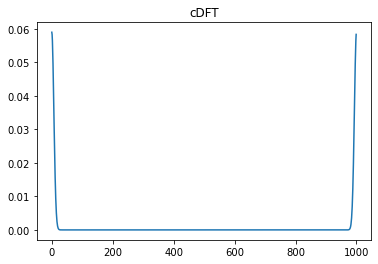

In [2]:
def cDFT(y):
    N = len(y) # length
    yk = np.zeros(N, dtype = 'cdouble') # double array
    
    # using nested for loop to calculate yk
    for a in range(N):
        for b in range(N):
            yk[a] += y[b]*np.exp(-1j*a*b*2*np.pi/N)
            
    print("First 10 Coefficients: \n yk:\n", yk[0:10])
    return yk/N

# using 1000 points, assuming 10,000 is a typo since it takes more than 2 minutes to generate
N1 = 1000 # number of points
t1 = np.linspace(0,6,N1)
kVal1 = np.arange(len(t1))

def y1(t):
    return np.exp(-25*(t-3)**2) # calulate y using t

yk = cDFT(y1(t1)) # call the function with y

plt.plot(kVal1, abs(yk))
plt.title("cDFT")
plt.show()


# $iDFT(yk)$ 

Calculates the $\tilde y_i$ coefficients using the complex form for inverse discrete Fourier transforms.  

- X-points in the range from 0 to 6 with 200 points
- $y(t) = e^{-25*(t-3)^2} + 0.03 \cos(46 \pi t)$
- Use $cDFT(y)$ to compute the $y_k$ values
- Remove the noise from $y_k$ values

First 10 Coefficients: 
 yk:
 [ 11.78727721+0.j         -11.59888238-0.1822098j
  11.28207711+0.35455356j -10.62092836-0.50087027j
   9.89303153+0.62241679j  -8.90480111-0.70082305j
   7.94844401+0.75134917j  -6.83478001-0.75456674j
   5.85266604+0.73936366j  -4.80064749-0.68323331j]


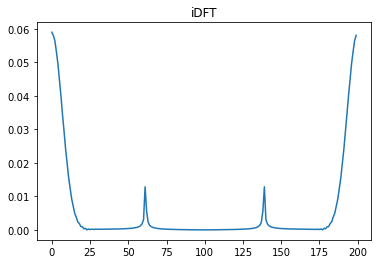

In [3]:
N2 = 200 # number of points

t2 = np.linspace(0,6,N2)
kVal2 = np.arange(len(t2))

def y2(t):
    return np.exp(-25*(t-3)**2) + 0.03*np.cos(46*np.pi*t) # calulate y using t

yk2 = cDFT(y2(t2))

#plot the |yk| vs t, now with the cosine noise term
plt.plot(kVal2, abs(yk2))
plt.title("iDFT")
plt.show()

In [4]:
# iDFT function
def iDFT(yk):
    N = len(yk) # length
    yi = np.zeros(N, dtype = 'cdouble') # double array
    
    # using nested for loop to calculate yi
    for a in range(N):
        for b in range(N):
            yi[a] += yk[b]*np.exp(-1j*a*b*2*np.pi/N)
            
    #print("First 10 Coefficients: \n yk:\n", yk[0:])
    return yi

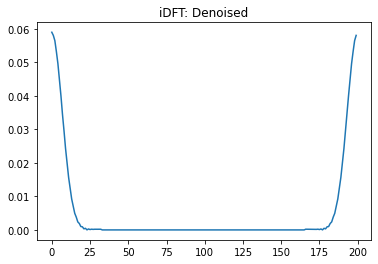

In [5]:
def denoiser(yk):
    yk[len(yk)//6:-len(yk)//6] = 0
    return yk

#plot the |yk| vs t, now with the cosine noise term
plt.plot(kVal2, denoiser(abs(yk2)))
plt.title("iDFT: Denoised")
plt.show()

# FFT vs iFFT Recovery

Apply a windowing function and plot the function with the x-axis as the index points.
Apply an FFT then change 3 points in the $y_k$ data to create noticeable noise in the signal 
Apply the Numpy iFFT function to recover the altered dataset.

In [6]:
# function creating the trapazoid window which takes in x points
def trapWindow(x):
    n = x.size # number of x
    tr = np.zeros(n) # trapizoid 
    # formating first and last 10%
    A = n//10
    B = n-A
    for i in range(1, n-1):
        if i <= A: # if it is in first 10 percent
            tr[i] = i/A
        elif i >= B: # if it is the last 10 percent
            tr[i] = 1 + (B-(i+1))/A        
        else: # otherwise it is 1
            tr[i] = 1
    return tr

# my original sine window function would give strange results so I changed it to be contained in a np array
# instead of just returning the np.sin(...)
def sineWindow(x):
    n = len(x)
    sine = np.zeros(n)
    for i in range(n): sine[i] = np.sin(i*np.pi/(n-1))
    return sine

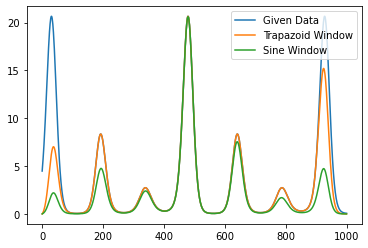

In [ ]:
y3 = np.loadtxt("PeriodicData.txt",delimiter = '\t')
t3 = np.arange(0,len(y3),1)

# by plotting the given data in comparission to the trapazoid window and sine window,
# I will select the window which more closely resembles the given data.
plt.plot(t3, y3)
plt.plot(t3, y3*trapWindow(t3))
plt.plot(t3, y3*sineWindow(t3))
plt.legend(["Given Data", "Trapazoid Window", "Sine Window"], loc = "upper right")
plt.show()

Evidently, the orange line representing the trapazoid window more closely reflects the given data, the blue line, than teh sine window, green. Use this

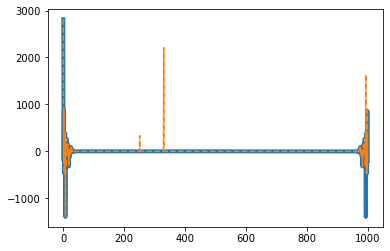

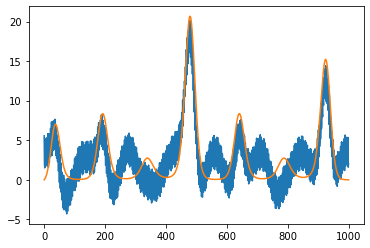

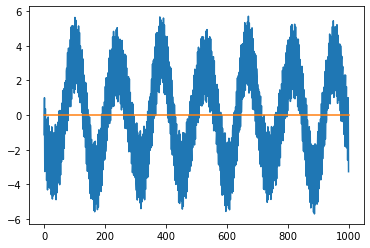

In [8]:
pts = 3 # number of points to change

trap = y3*trapWindow(t3)

def createNoise(yk):
    n = len(yk)
    noise = np.copy(yk) # buffer array, adding noise to a copy of yk
    
    for i in range(pts): noise[random.randint(0,n)] = random.random()*max(yk) # randomized noise
    return noise

ykN = np.fft.fft(trap) # discrete Fourier Transform
# noise for yk
noiseYK = createNoise(ykN)
# noise for given y data, y3
noiseY = np.fft.ifft(noiseYK)

# yk data with noise
plt.plot(t3, ykN, linewidth=4)
plt.plot(t3, noiseYK, '--')
plt.show()
# Real components
plt.plot(t3, np.real(noiseY))
plt.plot(t3, np.real(trap))
plt.show()
# Imaginary Components
plt.plot(t3, np.imag(noiseY))
plt.plot(t3, np.imag(trap))
plt.show()

# Multi Frequency

This dataset is comprise of different regions and different frequencies. 
Create a moving window to analyse the frequencies in that window.

Choose a windowing function that is 101 points across and will be defined by its centre point.  
Apply FFT to determine the frequency and magnitude of the oscillatory componenets within the region
Scan the window across all possible times so that you can identify the strength and frequency of each component as a function of time.

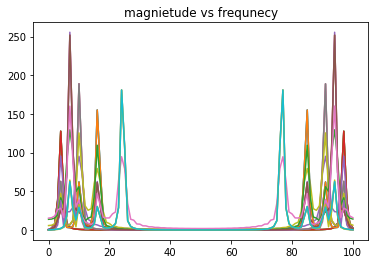

In [ ]:
data = np.loadtxt("PeriodicData2.txt", delimiter = ' ')
x = data[:, 0]
y = data[:, 1]

space = 101

# new sine function is required 
def newWindow(x, mid):        
    window = np.zeros(space)
    data = x[:,1] # initialize first row to match given data
    mid = mid-50
    for i in range (space): window[i] = data[(i+mid)]*np.sin(np.pi/(100)*i)
    return window


# find highest frequency
def find(x, mid):    
    
    yK = np.fft.fft(newWindow(x, mid))
    absYK = abs(yK)
    
    # return max value from domain
    maxIndex = np.argmax(absYK[0 : 51])
    d = x[100, 0] 
    
    # maximize freqs in domain
    freqMax = 2*np.pi*maxIndex/d
    
    #plot and return
    plt.plot(np.arange(len(absYK)), (absYK))
    return [freqMax], [maxIndex]

L = space//2
freq, indicies = find(data, L)

for i in range(L, 951, L):
    # max
    f, index = find(data, i)
    # unique value check
    last = freq[-1]
    if last != f:   freq.extend(f), indicies.extend(index)

# plot
plt.title("magnietude vs frequnecy")
plt.show()

# returens magnitude of yk at certain index
def mag(data, mid, i): 
    yk = np.fft.fft(newWindow(data, mid))
    return abs(yk[i]) 

# initialize magnietu arrays
M1 = np.zeros(901)
M2 = np.copy(M1)
M3 = np.copy(M1)
M4 = np.copy(M1)
M5 = np.copy(M1)

# populate magnietude arrays
for j in range(L, 951):
    mj = int(j-L)
    M1[mj] = mag(data, j, indicies[0])
    M2[mj] = mag(data, j, indicies[1])
    M3[mj] = mag(data, j, indicies[2])
    M4[mj] = mag(data, j, indicies[3])
    M5[mj] = mag(data, j, indicies[4])

repeating frequencies:
 [12.566370614359172, 31.41592653589793, 50.26548245743669, 21.991148575128552, 75.39822368615503] 
Indicies:
 [4, 10, 16, 7, 24]


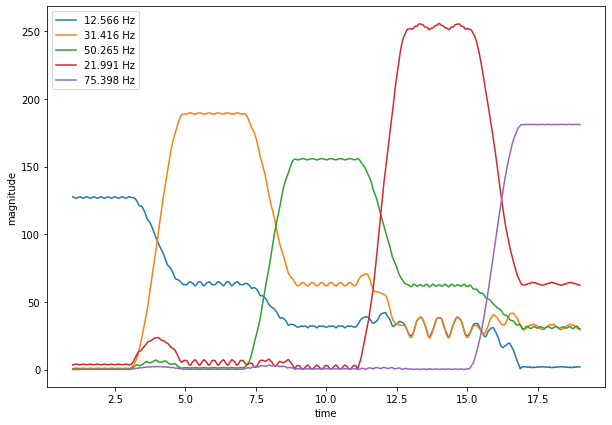

In [10]:
t4 = data[50:951, 0]

print('repeating frequencies:\n', freq, '\nIndicies:\n', indicies) 

plt.figure(figsize=(10, 7)) # for clarity
plt.plot(t4, M1)
plt.plot(t4, M2)
plt.plot(t4, M3)
plt.plot(t4, M4)
plt.plot(t4, M5)

plt.legend(['%.3f Hz' %freq[0], '%.3f Hz' %freq[1], '%.3f Hz' %freq[2], '%.3f Hz' %freq[3], '%.3f Hz' %freq[4]], loc='upper left')
plt.xlabel('time')
plt.ylabel('magnitude')

plt.show()